<html>
<body>
<img src="https://raw.githubusercontent.com/daniel-bss/breadbasket/main/img/dataset-cover.png" style="width: 100%; height:220px;">
<h1 style="margin-left:280px;">MARKET BASKET ANALYSIS</h1>
<hr style="border: 2px solid black;">
<h1>1. Business Understanding</h1>
<p>Penting bagi perusahaan maupun bisnis kecil untuk membuat perencanaan yang matang terhadap produk-produknya yang akan dijual demi memaksimalkan <i>revenue</i>. Namun seringkali terjadi keadaan di mana produk yang terjual timpang sebelah, beberapa produk cepat laku hingga habis, namun tidak sedikit juga produk yang tidak kunjung laku.</p>
<br>
<p>Pada <i>notebook</i> ini terdapat <a href="https://www.kaggle.com/mittalvasu95/the-bread-basket" target="_blank">dataset</a> dari sebuah Toko Roti yang berisi <i>history</i> penjualan selama kurang lebih 7 bulan. Dari dataset ini, kami mau membantu Toko Roti tersebut untuk memaksimalkan penjualan roti dan beranekaragam makanan mereka dengan cara mengeskplorasi dataset hingga melakukan <b><i>Market Basket Analysis</b></i>. Maka dari itu, rumusan masalah yang diajukan adalah:</p>
<ol>
    <li>Di saat waktu apa kah terjadi jumlah transaksi maksimum?</li>
    <li>Produk apa saja yang sering dibeli <i>customers</i> secara bersamaan?</li>
</ol>
</body>
</html>

# 2. Data Understanding

Dari data yang diberikan, akan dilakukan proses pengambilan data, mendeskripsi dan eksplorasi <i>(Exploratory Data Analysis)</i>

In [1]:
# Library Python dasar untuk pengolahan array dan DataFrame, serta visualisasi dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/daniel-bss/breadbasket/main/bread%20basket.csv?token=ASFMJ2SI7O3WZIZPYE6VBZLBOICQY")
print("Ukuran DataFrame:", data.shape)
data.head() # Data pada 5 baris pertama

Ukuran DataFrame: (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


Dataset terdiri dari kolom-kolom berisi:
<ul>
    <li><b>Transaction</b>: kode pemesanan yang unik untuk setiap customer yang melakukan pembelian.</li>
    <li><b>Item</b>: produk berupa makanan dan minuman, seperti <i>Coffee</i> dan <i>Sandwich</i></li>
    <li><b>date_time</b>: waktu dilakukannya pemesanan, dengan format <i>dd-mm-yyyy hh:mm</i>.</li>
    <li><b>period_day</b>: menunjukkan latar waktu (<i>morning</i>, <i>afternoon</i>, <i>evening</i>, dan <i>night</i>)</li>
    <li><b>weekday_weekend</b>: menunjukkan hari kerja (<i>weekday</i>) atau akhir pekan (<i>weekend</i>)</li>
</ul>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


Terlihat bahwa dataset hanya memiliki satu fitur yang numerik, yaitu `Transaction`.
<br>
Dan juga tidak ada data yang hilang (<i>NaN</i>), sehingga tidak perlu dilakukan <i>missing values handling</i>. 

In [4]:
# Melihat ringkasan Statistika Deskriptif
data.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


Dari dataset yang diberikan, hanya kolom `Transaction`-lah yang bersifat numerik, maka dari itu `data.describe()` hanya mengembalikan 1 kolom.
<br><br>
Terlihat bahwa data `Transaction` memiliki distribusi yang cukup baik, karena tidak ada lonjakan signifikan antara nilai kuantil-kuantilnya, namun deviasi standarnya masih cenderung terlalu besar, yang menandakan bahwa banyak nilai-nilai yang jauh dari mean-nya.
<br><br>
Untuk lebih jelasnya, mari lihat histogramnya.

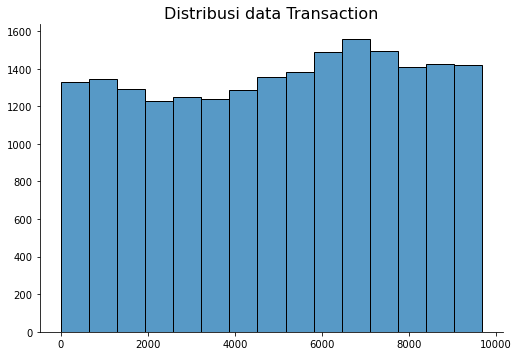

In [5]:
sns.displot(data = data, bins = 15, x = "Transaction", height = 5, aspect = 1.5)
plt.title("Distribusi data Transaction", size = 16)
plt.xlabel(""); plt.ylabel("") 
plt.show()

Dari asumsi sebelumnya, benar bahwa distribusinya tidak <i>skewed</i>. Ternyata penyebab deviasi standarnya cenderung besar 
karena data `Transaction` memiliki distribusi <i>uniform</i>.

Untuk membantu proses <i>Exploratory Data Analysis</i>, alangkah baiknya untuk mengubah fitur date_time menjadi object datetime, sehingga kita bisa dengan mudah mengakses bulan, hari, dan jam dilakukannya transaksi, sebagai berikut:

In [6]:
data['date_time'] = pd.to_datetime(data['date_time'], format = "%d-%m-%Y %H:%M")

In [7]:
data["date_time"].dtype # kolom date_time sekarang sudah bertipe object Timestamp

dtype('<M8[ns]')

Tambahkan kolom `bulan`, `hari`, dan `jam` dengan menambahkan attribute `.dt`

In [8]:
data["bulan"] = data['date_time'].dt.month
data["hari"] = data['date_time'].dt.weekday
data["jam"] = data['date_time'].dt.hour

In [9]:
# hasil akhir
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,bulan,hari,jam
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


### Melihat 10 produk yang paling banyak dibeli.

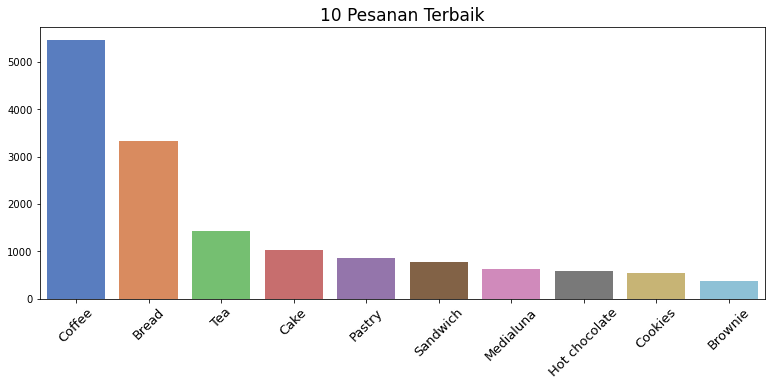

In [10]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Item"].value_counts()[:10].index, y = data["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 Pesanan Terbaik', size = 17)
plt.show()

Terlihat bahwa Kopi dan Roti adalah item yang paling dominan dibeli. Kemudian diikuti juga oleh pembelian Teh pada posisi ke-3.

### Melihat jumlah transaksi setiap bulannya.

Text(0.5, 1.0, 'Jumlah Transaksi Tiap Bulan (Oktober - April)')

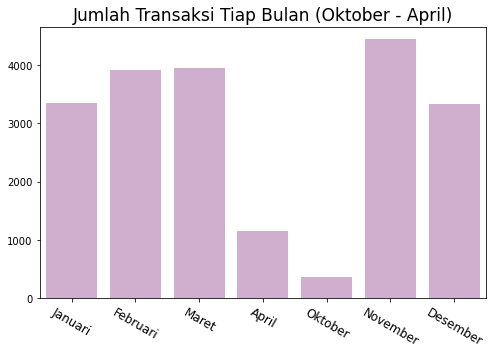

In [11]:
data_perbulan = data.groupby('bulan')['Transaction'].count()

plt.figure(figsize = (8,5))
sns.barplot(
    x = ["Januari", "Februari", "Maret", "April", "Oktober", "November", "Desember"], 
    y = data_perbulan.values, color = "#D5AAD3")
plt.xticks(size = 12, rotation = -30)
plt.title("Jumlah Transaksi Tiap Bulan (Oktober - April)", size = 17)

Pada dataset ini, <i>record</i> transaksi dimulai dari **akhir Oktober** hingga **awal April**, yang menyebabkan sangat sedikitnya data yang tersedia untuk bulan April dan Oktober
<br><br>
Dari barplot di atas terlihat bahwa kebanyakan transaksi terjadi pada bulan Februari, Maret, dan Oktober

### Melihat total transaksi per hari

Text(0.5, 1.0, 'Total Pesanan Per Hari')

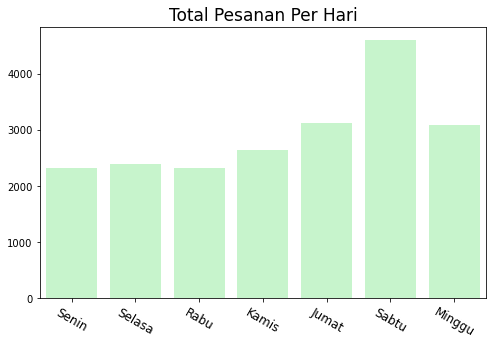

In [12]:
data_perhari = data.groupby('hari')['Transaction'].count()

plt.figure(figsize = (8,5))
sns.barplot(
    x = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"], 
    y = data_perhari.values, color = "#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("Total Pesanan Per Hari", size = 17)

Terlihat bahwa hari Sabtu adalah saat Toko sedang ramai-ramainya.

### Melihat jumlah pesanan setiap jamnya.

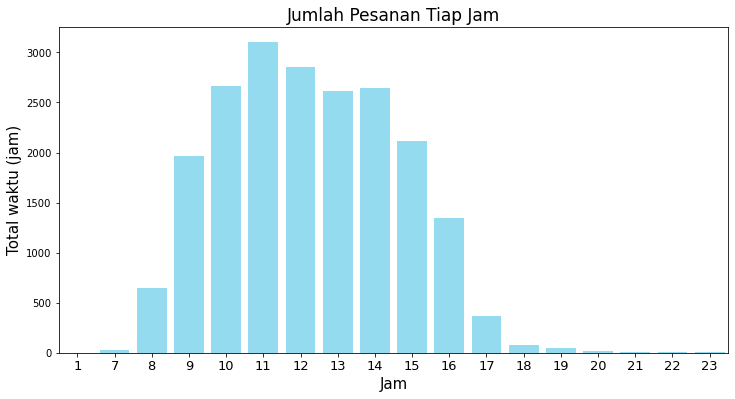

In [13]:
data_jam = data.groupby("jam")["Transaction"].count()

plt.figure(figsize=(12,6))
sns.barplot(x = data_jam.index, y = data_jam.values, color = "#85E3FF")
plt.xlabel('Jam', size = 15)
plt.ylabel('Total waktu (jam)', size = 15)
plt.title('Jumlah Pesanan Tiap Jam', size = 17)
plt.xticks(size = 13)
plt.show()

Terlihat bahwa mayoritas pesanan terjadi antara jam 9 sampai jam 3, atau dari pagi hingga menjelang sore.

### Melihat 10 items terpopuler pada setiap `period_day` (Pagi, Siang, Sore, Malam)

In [14]:
data_period_day = data.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
hari = [['morning', 'Pagi'],
        ['afternoon', 'Siang'],
        ['evening', 'Sore'],
        ['night', 'Malam']]

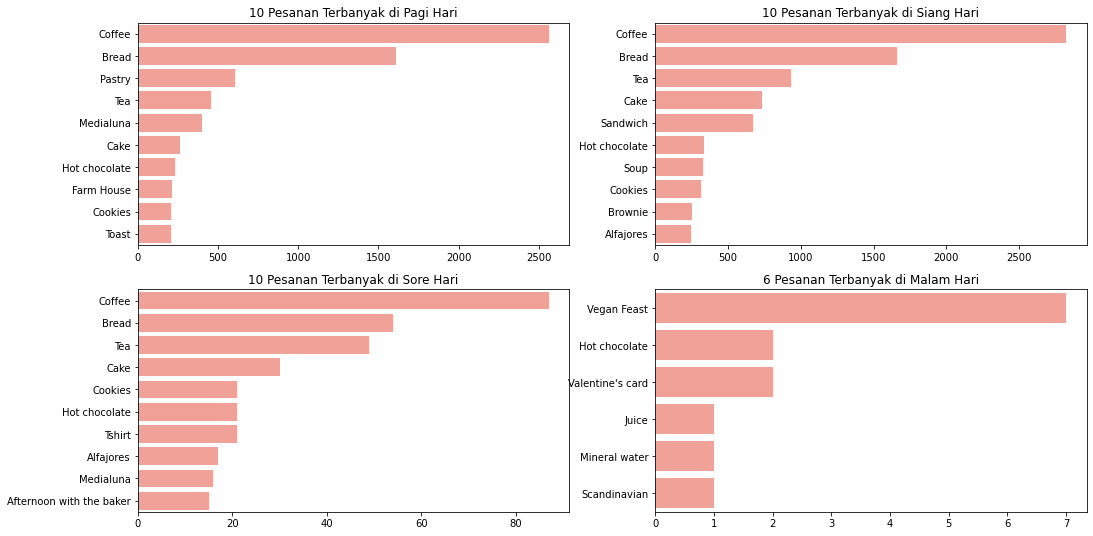

In [15]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (17,9))

index = 0
for i in range(len(ax)):
    for j in range(len(ax[0])):
        data_temp = data_period_day[data_period_day["period_day"] == hari[index][0]].head(10)
        sns.barplot(x = data_temp["Transaction"], y = data_temp["Item"], ax = ax[i,j], color = "#FF968A")
        ax[i,j].set_xlabel(""); ax[i,j].set_ylabel("")
        if index != 3:
            ax[i,j].set_title(f"10 Pesanan Terbanyak di {hari[index][1]} Hari")
        else:
            ax[i,j].set_title(f"6 Pesanan Terbanyak di {hari[index][1]} Hari")
        index += 1
plt.show()

Maupun Pagi, Siang, atau pun Sore, Kopi dan Roti selalu menempati 2 Pesanan terbanyak.
<br>
Karena pesanan pada malam hari sangat sedikit, yaitu 14, sepertinya sulit untuk menyimpulkan bahwa <i>customers</i> di malam hari ada vegetarian.

# 3. Data Preparation

Selanjutnya dalam Data Preparation, akan dilakukan sedikit integrasi data, mengingat dataset ini sudah bersih dari <i>invalid</i> dan <i>missing values</i>.
<br>
Data Integration yang akan dilakukan adalah memastikan kolom `Item` bersih dari <i>whitespaces</i>, dan juga menormalisasi data dengan mengubah semua <i>strings</i> pada kolom `Item` menjadi <i>lowercase</i>.

In [16]:
# Menerapkan pandas apply pada kolom "Item" yang mengembalikan strings.lower():
data["Item"] = data["Item"].apply(lambda item: item.lower())

In [17]:
# Memastikan setiap nilai "Item" bersih dari whitespace:
data["Item"] = data["Item"].apply(lambda item: item.strip())

Terakhir, data yang akan kita gunakan untuk membuat model adalah `Transaction` dan `Item`

In [18]:
data = data[["Transaction", "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


# 4. Modeling

Dalam percobaan <i>Market Basket Analysis</i> ini, algoritma yang digunakan adalah <i>Apriori Algorithm</i>, salah satu algoritma dalam <i>Association Analysis</i> dari ranah <i>Unsupervised Learning</i>. 
<br><br>
Ada beberapa <i>metrics</i> yang digunakan untuk mengukur performa dari algoritma <i>Apriori</i> ini, yaitu:
<ol>
    <li><b>Support</b>: persentase jumlah keberadaan item dalam seluruh dataset.</li>
    <li><b>Confidence</b>: persentase jumlah keberadaan 2 item (A dan B) bersamaan terhadap jumlah keberadaan 1 item ang berkaitan (item A).</li>
    <li><b>Lift</b>: kecenderungan item B dibeli bersama item A, jika item A juga dibeli.</li>
</ol>

In [19]:
from mlxtend.frequent_patterns import association_rules, apriori

In [20]:
item_count = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
item_count.head()

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1


In [21]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print("Ukuran dataset:", item_count_pivot.shape)
print("Jumlah transaksi:", item_count_pivot.shape[0])
print("Jumlah items:", item_count_pivot.shape[1])

Ukuran dataset: (9465, 94)
Jumlah transaksi: 9465
Jumlah items: 94


### Inisialisasi model Apriori dengan minimum support sebesar 1%
Artinya, pada data kita dengan 9465 jumlah transaksi, kita ingin <b>minimal</b> ada 94 transaksi yang melibatkan pembelanjaan 2 atau lebih item secara bersamaan!

In [24]:
support = 0.01 # 1%
frequent_items = apriori(item_count_pivot, min_support = support, use_colnames = True)
frequent_items.sort_values("support", ascending = False).head(10)

,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(coffee, bread)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(coffee, cake)"


Mungkin kita sudah menduga-duga bahwa Kopi dan Roti akan menempati posisi teratas lagi, setelah kita sudah melakukan beberapa visualisasi data sebelumnya. Ternyata dugaan kita benar, Kopi dan Roti memiliki persentase <i>support</i> yang cukup tinggi, artinya benar bahwa memang <i>items</i> ini paling sering dibeli.
<br><br>
Pertanyaannya, dengan apakah Kopi dan Roti itu biasa dibeli bersamaan? Apakah customers hanya membeli Kopi atau Roti saja? Untuk menjawab pertanyaan tersebut, kita menerapkan <i>Association Rules</i>, yang dapat menghitung <i>Confidence</i> dan <i>Lift</i> pada item-item yang dibeli bersamaan

### Association Rules

Kita menginginkan batas minimum <i>lift</i>-nya sebesar 1. 
<br><br>
Nilai <i>Lift</i> memiliki rentang nilai antara 0 hingga tak terhingga.<br>
Semakin tinggi <i>lift</i> menandakan bahwa kedua item cenderung sering dibeli bersamaan, sebaliknya jika di bawah 1, menandakan bahwa kedua item tidak memiliki hubungan sama sekali

In [25]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric = metric, min_threshold = min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
30,(toast),(coffee),0.023666,0.704403,1.472431
28,(spanish brunch),(coffee),0.010882,0.598837,1.251766
18,(medialuna),(coffee),0.035182,0.569231,1.189878
23,(pastry),(coffee),0.047544,0.552147,1.154168
0,(alfajores),(coffee),0.019651,0.540698,1.130235
17,(juice),(coffee),0.020602,0.534247,1.116750
25,(sandwich),(coffee),0.038246,0.532353,1.112792
7,(cake),(coffee),0.054728,0.526958,1.101515
27,(scone),(coffee),0.018067,0.522936,1.093107
12,(cookies),(coffee),0.028209,0.518447,1.083723


Terlihat bahwa Kopi sering dibeli bersamaan dengan Roti Bakar, kemudian Roti sering dibeli bersamaan dengan <i>Pastry</i>

---